In [1]:
APIKey = 'YourAPIKeyFromBinance'
SecretKey = 'YourSecretKeyForTheAPIAbove'

In [2]:
!pip install python-binance pandas mplfinance

In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [4]:
#creating the client
client = Client(APIKey, SecretKey)

In [5]:
# get all symbol prices
prices = client.get_all_tickers()

In [6]:
#serching for BTC & ETH 
for i in range(len(prices)):
    if(prices[i]['symbol'] == 'BTCUSDT' or prices[i]['symbol'] == 'ETHUSDT'):
        print(prices[i]);

{'symbol': 'BTCUSDT', 'price': '23622.82000000'}
{'symbol': 'ETHUSDT', 'price': '1551.51000000'}


In [7]:
#Or the we can make the following: 
PricesDataFrame = pd.DataFrame(prices)

In [8]:
PricesDataFrame.set_index('symbol', inplace=True);

In [9]:
PricesDataFrame.loc['ETHUSDT']

price    1551.51000000
Name: ETHUSDT, dtype: object

In [10]:
# get market depth
depth = client.get_order_book(symbol='ETHUSDT')

In [11]:
#5 first strokes of information given by the API
PricesDataFrame.head()
# or the last 5 ones
#PricesDataFrame.tail()

,price
symbol,
ETHBTC,0.06566600
LTCBTC,0.00250300
BNBBTC,0.01118100
NEOBTC,0.00042700
QTUMETH,0.00204300


In [12]:
#Putting the depth inside the dataframe
DepthDataFrame = pd.DataFrame(depth['bids'])
DepthDataFrame.columns = ['Price', 'Volume']
DepthDataFrame.head() 

,Price,Volume
0,1551.25000000,0.10120000
1,1551.24000000,1.39130000
2,1551.23000000,0.16120000
3,1551.13000000,0.19340000
4,1551.08000000,0.20170000


In [13]:
DepthDataFrame.dtypes

Price     object
Volume    object
dtype: object

In [101]:
#getting a historcal data
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2022")

In [102]:
# client.get_historical_klines??

In [103]:
KlinesDataFrame = pd.DataFrame(klines)

In [104]:
KlinesDataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,3676.22000000,3776.45000000,3673.46000000,3765.54000000,154143.89680000,1641081599999,574718328.45274400,408666,76937.97980000,286855413.58892400,0
1,1641081600000,3765.54000000,3857.44000000,3717.30000000,3828.27000000,154791.42630000,1641167999999,585374957.73046000,450610,81170.50530000,307056603.74279000,0
2,1641168000000,3828.11000000,3853.09000000,3680.00000000,3765.89000000,236245.85860000,1641254399999,892944105.55299400,594541,114525.62990000,433084435.77665600,0
3,1641254400000,3765.89000000,3900.73000000,3713.11000000,3785.11000000,288258.55490000,1641340799999,1098182607.92572600,676651,147451.42850000,561958201.76209900,0
4,1641340800000,3785.10000000,3848.00000000,3415.00000000,3540.63000000,397942.03630000,1641427199999,1464819255.09351100,962670,183641.11340000,676663293.71856000,0


In [105]:
#short characteristics of the following chart for understanding:

# [
#     [
#         1499040000000,      # Open time
#         "0.01634790",       # Open
#         "0.80000000",       # High
#         "0.01575800",       # Low
#         "0.01577100",       # Close
#         "148976.11427815",  # Volume
#         1499644799999,      # Close time
#         "2434.19055334",    # Quote asset volume
#         308,                # Number of trades
#         "1756.87402397",    # Taker buy base asset volume
#         "28.46694368",      # Taker buy quote asset volume
#         "17928899.62484339" # Can be ignored
#     ]
# ]

KlinesDataFrame.columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume',
                           'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume',
                           'Can be ignored']

In [106]:
KlinesDataFrame.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Can be ignored
0,1640995200000,3676.22000000,3776.45000000,3673.46000000,3765.54000000,154143.89680000,1641081599999,574718328.45274400,408666,76937.97980000,286855413.58892400,0
1,1641081600000,3765.54000000,3857.44000000,3717.30000000,3828.27000000,154791.42630000,1641167999999,585374957.73046000,450610,81170.50530000,307056603.74279000,0
2,1641168000000,3828.11000000,3853.09000000,3680.00000000,3765.89000000,236245.85860000,1641254399999,892944105.55299400,594541,114525.62990000,433084435.77665600,0
3,1641254400000,3765.89000000,3900.73000000,3713.11000000,3785.11000000,288258.55490000,1641340799999,1098182607.92572600,676651,147451.42850000,561958201.76209900,0
4,1641340800000,3785.10000000,3848.00000000,3415.00000000,3540.63000000,397942.03630000,1641427199999,1464819255.09351100,962670,183641.11340000,676663293.71856000,0


In [107]:
KlinesDataFrame.shape

(201, 12)

In [108]:
KlinesDataFrame.dtypes

Open time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quote asset volume              object
Number of trades                 int64
Taker buy base asset volume     object
Taker buy quote asset volume    object
Can be ignored                  object
dtype: object

In [109]:
KlinesDataFrame['Open time'] = pd.to_datetime(KlinesDataFrame['Open time']/1000, unit = 's')
KlinesDataFrame['Close time'] = pd.to_datetime(KlinesDataFrame['Close time']/1000, unit = 's')

In [110]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume', 'Taker buy base asset volume', 'Taker buy quote asset volume']

In [111]:
KlinesDataFrame[numeric_columns] = KlinesDataFrame[numeric_columns].apply(pd.to_numeric, axis=1)

In [112]:
KlinesDataFrame.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Can be ignored
0,2022-01-01,3676.22,3776.45,3673.46,3765.54,154143.8968,2022-01-01 23:59:59.999000064,5.747183e+08,408666,76937.9798,2.868554e+08,0
1,2022-01-02,3765.54,3857.44,3717.30,3828.27,154791.4263,2022-01-02 23:59:59.999000064,5.853750e+08,450610,81170.5053,3.070566e+08,0
2,2022-01-03,3828.11,3853.09,3680.00,3765.89,236245.8586,2022-01-03 23:59:59.999000064,8.929441e+08,594541,114525.6299,4.330844e+08,0
3,2022-01-04,3765.89,3900.73,3713.11,3785.11,288258.5549,2022-01-04 23:59:59.999000064,1.098183e+09,676651,147451.4285,5.619582e+08,0
4,2022-01-05,3785.10,3848.00,3415.00,3540.63,397942.0363,2022-01-05 23:59:59.999000064,1.464819e+09,962670,183641.1134,6.766633e+08,0


In [113]:
KlinesDataFrame.dtypes

Open time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Can be ignored                          object
dtype: object

In [114]:
KlinesDataFrame.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
count,201.000000,201.000000,201.000000,201.000000,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,2452.045124,2525.275373,2361.851343,2441.500149,7.283796e+05,1.488237e+09,9.099961e+05,3.637405e+05,7.436785e+08
std,772.594604,782.789907,760.199782,770.286728,5.388797e+05,6.937436e+08,4.572652e+05,2.683105e+05,3.452241e+08
min,995.120000,1078.880000,881.560000,995.130000,1.541439e+05,4.707147e+08,2.980000e+05,7.693798e+04,2.332485e+08
25%,1817.960000,1874.980000,1773.050000,1813.640000,3.863849e+05,1.067796e+09,6.254310e+05,1.939293e+05,5.359672e+08
50%,2665.160000,2759.510000,2571.720000,2636.290000,5.353110e+05,1.401317e+09,8.092540e+05,2.698341e+05,6.916970e+08
75%,3040.570000,3129.110000,2950.210000,3036.000000,8.687342e+05,1.736496e+09,1.050193e+06,4.378863e+05,8.656880e+08
max,3828.110000,3900.730000,3717.300000,3828.270000,3.626352e+06,4.611744e+09,3.047112e+06,1.791798e+06,2.287434e+09


In [115]:
import mplfinance as mpf

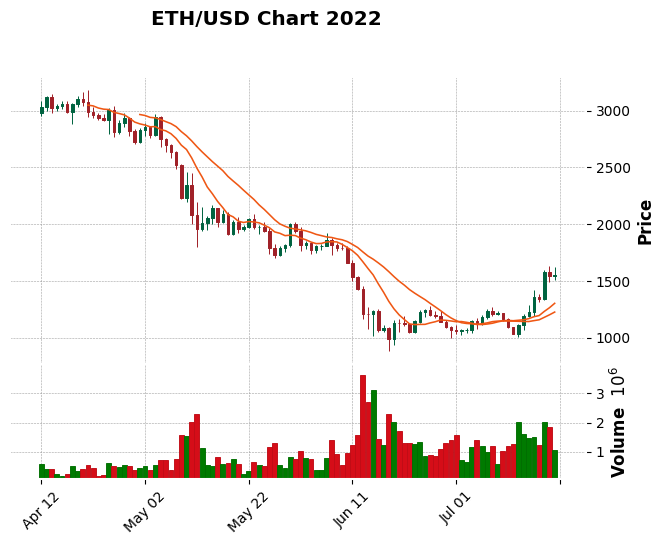

In [123]:
mpf.plot(KlinesDataFrame.set_index('Close time').tail(100),
        type = 'candle', style='charles',
        volume = True,
        title = 'ETH/USD Chart 2022',
        mav = (10,20))